<a href="https://colab.research.google.com/github/yashrtomar/eda-on-hotel-booking-data/blob/main/Numerical-Programming-in-Python-Web-Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>
 403
</title>
403 Forbidden



## **Fetching Movie URL's**

In [ ]:
# Write Your Code here

# Create a list for movie URL's
movie_urls = []

# Find all the HTML a tags as those contain URL's using find_all(),
# also specify class name using 'class_' to be specific
# append the values href attributes of all HTML a tags in the list 'movie_urls' using for loop
for movie_url in soup.find_all('a', class_='title-list-grid__item--link'):
  movie_urls.append('https://www.justwatch.com' + movie_url.get('href'))

# Display output
print(f"length: {len(movie_urls)}\n\nlist of all movie URL's:")
movie_urls

length: 100

list of all movie URL's:


['https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film',
 'https://www.justwatch.com/in/movie/laapataa-ladies',
 'https://www.justwatch.com/in/movie/premalu',
 'https://www.justwatch.com/in/movie/article-370',
 'https://www.justwatch.com/in/movie/hanu-man',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/the-crew-2024',
 'https://www.justwatch.com/in/movie/amar-singh-chamkila',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/anatomie-dune-chute',
 'https://www.justwatch.com/in/movie/anyone-but-you',
 'https://www.justwatch.com/in/movie/black-magic-2024',
 'https://www.justwatch.com/in/movie/animal-2022',
 'https://www.justwatch.com/in/movie/dune-2021',
 'https://www.justwatch.com/in/movie/monkey-man',
 'https://www.justwatch.com/in/movie/kung-fu-panda-4',
 'https://www.justwatch.com/in/movie/family-star',
 'https://www.justwatch.c

## **Scrapping Movie title, Release year, Genre, IMDb rating, Streaming services available**

In [ ]:
# Write Your Code here

# Create an empty list to store extracted information
movies = []

# For loop for accessing all the URL's in movie_urls list for scraping
for url in movie_urls:

  # Send an HTTP GET requests to the URL's
  movie_page = (requests.get(url))

  # Use time.sleep() for controlling amount of requests made to the website
  time.sleep(3)

  # Parse the HTML content using BeautifulSoup with the 'html.parser'
  movie_soup = BeautifulSoup(movie_page.text, 'html.parser')

  # Extracting information

  # Title
  try:
    title = movie_soup.find('h1').text
  except:
    title = None

  # Release year
  try:
    release_year = movie_soup.find('span', class_='text-muted').text.strip("( )")
  except:
    release_year = None

  # Genre
  try:
    genre =  movie_soup.find('h3',class_ = 'detail-infos__subheading',string = 'Genres').find_next_sibling('div',class_ ='detail-infos__value').text.strip().split(', ')
  except:
    genre = None

  # IMDB rating
  try:
    imdb_rating = movie_soup.find_all('div', class_='jw-scoring-listing__rating')[1].text.split('(')[0].strip()
  except:
    imdb_rating = None

  # Runtime
  try:
    runtime = movie_soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    runtime = None

  # Age rating
  try:
    age_rating = movie_soup.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    age_rating = None

  # Production Country
  try:
    production_country = movie_soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    production_country = None

  # Streaming services
  try:
    stream_services_container = movie_soup.find('div', class_='buybox-row stream').find_all('img')
    stream_service = [img['alt'] for img in stream_services_container]
  except:
    stream_service

  movies_info ={
    'Title' : title,
    'Release_year' : release_year,
    'Genre' : genre,
    'imdb_rating' : imdb_rating,
    'Runtime' : runtime,
    'Age_rating' : age_rating,
    'Production_Country' : production_country,
    'Stream_Service' : stream_service,
    'Type' : 'Movie',
    'URL' : url
  }

  movies.append(movies_info)

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here

# Create dataframe
movies_data = pd.DataFrame(movies)

# Display dataframe
movies_data.head(10)

,Title,Release_year,Genre,imdb_rating,Runtime,Age_rating,Production_Country,Stream_Service,Type,URL
0,Teri Baaton Mein Aisa Uljha Jiya,2024,"[Comedy, Drama, Romance, Science-Fiction]",6.4,2h 21min,None,India,[Amazon Prime Video],Movie,https://www.justwatch.com/in/movie/untitled-sh...
1,Laapataa Ladies,2024,"[Comedy, Drama]",8.5,2h 2min,UA,India,[Netflix],Movie,https://www.justwatch.com/in/movie/laapataa-la...
2,Premalu,2024,"[Romance, Comedy]",7.9,2h 36min,U,India,[aha],Movie,https://www.justwatch.com/in/movie/premalu
3,Article 370,2024,"[Drama, Mystery & Thriller, Action & Adventure]",8.1,2h 38min,None,India,[Netflix],Movie,https://www.justwatch.com/in/movie/article-370
4,Hanu-Man,2024,"[Science-Fiction, Fantasy, Action & Adventure,...",7.9,2h 39min,UA,India,"[Jio Cinema, Zee5]",Movie,https://www.justwatch.com/in/movie/hanu-man
5,Dune: Part Two,2024,"[Action & Adventure, Science-Fiction, Drama]",8.7,2h 47min,None,United States,"[Jio Cinema, Zee5]",Movie,https://www.justwatch.com/in/movie/dune-part-two
6,Oppenheimer,2023,"[Drama, History]",8.3,3h 0min,UA,"United States, United Kingdom",[Jio Cinema],Movie,https://www.justwatch.com/in/movie/oppenheimer
7,Crew,2024,"[Comedy, Drama]",6.5,1h 58min,UA,India,[Jio Cinema],Movie,https://www.justwatch.com/in/movie/the-crew-2024
8,Amar Singh Chamkila,2024,"[Drama, Music & Musical, Romance]",8.0,2h 25min,None,India,[Netflix],Movie,https://www.justwatch.com/in/movie/amar-singh-...
9,Manjummel Boys,2024,"[Mystery & Thriller, Drama, Action & Adventure]",8.6,2h 15min,UA,India,[Netflix],Movie,https://www.justwatch.com/in/movie/manjummel-boys


In [ ]:
# Display dataframe information
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               100 non-null    object
 1   Release_year        100 non-null    object
 2   Genre               100 non-null    object
 3   imdb_rating         99 non-null     object
 4   Runtime             100 non-null    object
 5   Age_rating          55 non-null     object
 6   Production_Country  100 non-null    object
 7   Stream_Service      100 non-null    object
 8   Type                100 non-null    object
 9   URL                 100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here

# Create a list for movie URL's
tv_urls = []

# Find all the HTML a tags as those contain URL's using find_all(),
# also specify class name using 'class_' to be specific
# append the values href attributes of all HTML a tags in the list 'movie_urls' using for loop
for tv_url in soup.find_all('a', class_='title-list-grid__item--link'):
  tv_urls.append('https://www.justwatch.com' + tv_url.get('href'))

# Display output
print(f"length: {len(movie_urls)}\n\nlist of all TV show URL's:")
movie_urls

length: 100

list of all TV show URL's:


['https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film',
 'https://www.justwatch.com/in/movie/laapataa-ladies',
 'https://www.justwatch.com/in/movie/premalu',
 'https://www.justwatch.com/in/movie/article-370',
 'https://www.justwatch.com/in/movie/hanu-man',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/the-crew-2024',
 'https://www.justwatch.com/in/movie/amar-singh-chamkila',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/anatomie-dune-chute',
 'https://www.justwatch.com/in/movie/anyone-but-you',
 'https://www.justwatch.com/in/movie/black-magic-2024',
 'https://www.justwatch.com/in/movie/animal-2022',
 'https://www.justwatch.com/in/movie/dune-2021',
 'https://www.justwatch.com/in/movie/monkey-man',
 'https://www.justwatch.com/in/movie/kung-fu-panda-4',
 'https://www.justwatch.com/in/movie/family-star',
 'https://www.justwatch.c

## **Fetching Tv Show TV show Title, Release year, Genre, IMDb rating, Streaming services available**

In [ ]:
# Write Your Code here

# Create an empty list to store extracted information
tv_shows = []

# For loop for accessing all the URL's in tv_show_urls list for scraping
for url in tv_urls:

  # Send an HTTP GET requests to the URL's
  tv_show_page = (requests.get(url))

  # Use time.sleep() for controlling amount of requests made to the website
  time.sleep(3)

  # Parse the HTML content using BeautifulSoup with the 'html.parser'
  tv_soup = BeautifulSoup(tv_show_page.text, 'html.parser')

  # Extracting information

  # Title
  try:
    title = tv_soup.find('h1').text
  except:
    title = None

  # Release year
  try:
    release_year = tv_soup.find('span', class_='text-muted').text.strip("( )")
  except:
    release_year = None

  # Genre
  try:
    genre =  tv_soup.find('h3',class_ = 'detail-infos__subheading',string = 'Genres').find_next_sibling('div',class_ ='detail-infos__value').text.strip().split(', ')
  except:
    genre = None

  # IMDB rating
  try:
    imdb_rating = tv_soup.find_all('div', class_='jw-scoring-listing__rating')[1].text.split('(')[0].strip()
  except:
    imdb_rating = None

  # Runtime
  try:
    runtime = tv_soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    runtime = None

  # Age rating
  try:
    age_rating = tv_soup.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    age_rating = None

  # Production Country
  try:
    production_country = tv_soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    production_country = None

  # Streaming services
  try:
    stream_services_container = tv_soup.find('div', class_='buybox-row stream').find_all('img')
    stream_service = [img['alt'] for img in stream_services_container]
  except:
    stream_service

  tv_shows_info ={
    'Title' : title,
    'Release_year' : release_year,
    'Genre' : genre,
    'imdb_rating' : imdb_rating,
    'Runtime' : runtime,
    'Age_rating' : age_rating,
    'Production_Country' : production_country,
    'Stream_Service' : stream_service,
    'Type' : 'TV show',
    'URL' : url
  }

  tv_shows.append(tv_shows_info)

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here

# Create TV show dataframe
tv_show_data = pd.DataFrame(tv_shows)

# Display TV show dataframe
tv_show_data.head(10)

,Title,Release_year,Genre,imdb_rating,Runtime,Age_rating,Production_Country,Stream_Service,Type,URL
0,Shōgun,2024,"[Drama, War & Military, History]",8.8,59min,None,United States,[Hotstar],TV show,https://www.justwatch.com/in/tv-show/shogun-2024
1,Fallout,2024,"[Action & Adventure, Drama, Science-Fiction, W...",8.5,59min,A,United States,[Amazon Prime Video],TV show,https://www.justwatch.com/in/tv-show/fallout
2,Panchayat,2020,"[Comedy, Drama]",8.9,33min,None,India,[Amazon Prime Video],TV show,https://www.justwatch.com/in/tv-show/panchayat
3,Mirzapur,2018,"[Crime, Action & Adventure, Drama, Mystery & T...",8.5,50min,None,India,[Amazon Prime Video],TV show,https://www.justwatch.com/in/tv-show/mirzapur
4,3 Body Problem,2024,"[Science-Fiction, Mystery & Thriller, Drama, F...",7.6,56min,A,United States,[Netflix],TV show,https://www.justwatch.com/in/tv-show/3-body-pr...
5,Game of Thrones,2011,"[Action & Adventure, Drama, Fantasy, Science-F...",9.2,58min,A,"United Kingdom, United States",[Jio Cinema],TV show,https://www.justwatch.com/in/tv-show/game-of-t...
6,Ripley,2024,"[Crime, Drama, Mystery & Thriller]",8.2,56min,None,United States,[Netflix],TV show,https://www.justwatch.com/in/tv-show/ripley
7,Heeramandi: The Diamond Bazaar,2024,"[Drama, History, Romance]",6.2,55min,None,India,[Netflix],TV show,https://www.justwatch.com/in/tv-show/heeramandi
8,Apharan,2018,"[Drama, Action & Adventure, Crime, Mystery & T...",8.3,24min,None,India,"[Jio Cinema, Alt Balaji]",TV show,https://www.justwatch.com/in/tv-show/apharan
9,Attack on Titan,2013,"[Animation, Action & Adventure, Drama, Fantasy...",9.0,25min,UA,Japan,[Amazon Prime Video],TV show,https://www.justwatch.com/in/tv-show/attack-on...


In [ ]:
# Display dataframe Info
tv_show_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               100 non-null    object
 1   Release_year        100 non-null    object
 2   Genre               100 non-null    object
 3   imdb_rating         100 non-null    object
 4   Runtime             100 non-null    object
 5   Age_rating          36 non-null     object
 6   Production_Country  100 non-null    object
 7   Stream_Service      100 non-null    object
 8   Type                100 non-null    object
 9   URL                 100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here

# Merge both TV show and movie data to create final dataframe
final_data = pd.concat([tv_show_data, movies_data], ignore_index = True)
final_data

,Title,Release_year,Genre,imdb_rating,Runtime,Age_rating,Production_Country,Stream_Service,Type,URL
0,Shōgun,2024,"[Drama, War & Military, History]",8.8,59min,None,United States,[Hotstar],TV show,https://www.justwatch.com/in/tv-show/shogun-2024
1,Fallout,2024,"[Action & Adventure, Drama, Science-Fiction, W...",8.5,59min,A,United States,[Amazon Prime Video],TV show,https://www.justwatch.com/in/tv-show/fallout
2,Panchayat,2020,"[Comedy, Drama]",8.9,33min,None,India,[Amazon Prime Video],TV show,https://www.justwatch.com/in/tv-show/panchayat
3,Mirzapur,2018,"[Crime, Action & Adventure, Drama, Mystery & T...",8.5,50min,None,India,[Amazon Prime Video],TV show,https://www.justwatch.com/in/tv-show/mirzapur
4,3 Body Problem,2024,"[Science-Fiction, Mystery & Thriller, Drama, F...",7.6,56min,A,United States,[Netflix],TV show,https://www.justwatch.com/in/tv-show/3-body-pr...
...,...,...,...,...,...,...,...,...,...,...
195,The Holdovers,2023,"[Comedy, Drama]",7.9,2h 13min,A,United States,[Tubi TV],Movie,https://www.justwatch.com/in/movie/the-holdovers
196,Late Night with the Devil,2024,[Horror],7.1,1h 33min,None,"United States, Australia, United Arab Emirates",[Tubi TV],Movie,https://www.justwatch.com/in/movie/late-night-...
197,DeAr,2024,"[Romance, Comedy, Drama, Kids & Family]",5.3,2h 14min,None,India,[Netflix],Movie,https://www.justwatch.com/in/movie/dear-2024
198,John Wick,2014,"[Action & Adventure, Mystery & Thriller, Crime]",7.4,1h 41min,None,United States,"[Lionsgate Play, Lionsgate Play Apple TV Chann...",Movie,https://www.justwatch.com/in/movie/john-wick


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               200 non-null    object
 1   Release_year        200 non-null    object
 2   Genre               200 non-null    object
 3   imdb_rating         199 non-null    object
 4   Runtime             200 non-null    object
 5   Age_rating          91 non-null     object
 6   Production_Country  200 non-null    object
 7   Stream_Service      200 non-null    object
 8   Type                200 non-null    object
 9   URL                 200 non-null    object
dtypes: object(10)
memory usage: 15.8+ KB


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here

# Change datatype of IMDB Ratings to float for calculations
movies_data['imdb_rating'] = movies_data['imdb_rating'].replace('', None).astype(float)
tv_show_data['imdb_rating'] = tv_show_data['imdb_rating'].replace('', None).astype(float)

# Calculate Mean IMDB Ratings
movies_mean_rating = round(movies_data['imdb_rating'].mean(), 2)
tv_mean_rating = round(tv_show_data['imdb_rating'].mean(), 2)

# Print the output
print(f'Mean IMDB Rating for Movies: {movies_mean_rating}')
print(f'Mean IMDB Rating for TV Shows: {tv_mean_rating}')

Mean IMDB Rating for Movies: 7.02
Mean IMDB Rating for TV Shows: 7.81


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here

# Extract individual genres and count occurrences to find top genres.
genre_count = final_data['Genre'].explode().str.strip().value_counts()

#Printing Top Genres.
genre_count

Genre
Drama                 152
Mystery & Thriller     88
Action & Adventure     83
Comedy                 59
Science-Fiction        47
Crime                  47
Fantasy                38
Romance                30
Horror                 21
Kids & Family          16
Animation              12
History                11
War & Military          6
Made in Europe          6
Sport                   5
Reality TV              3
Music & Musical         3
Western                 2
Name: count, dtype: int64

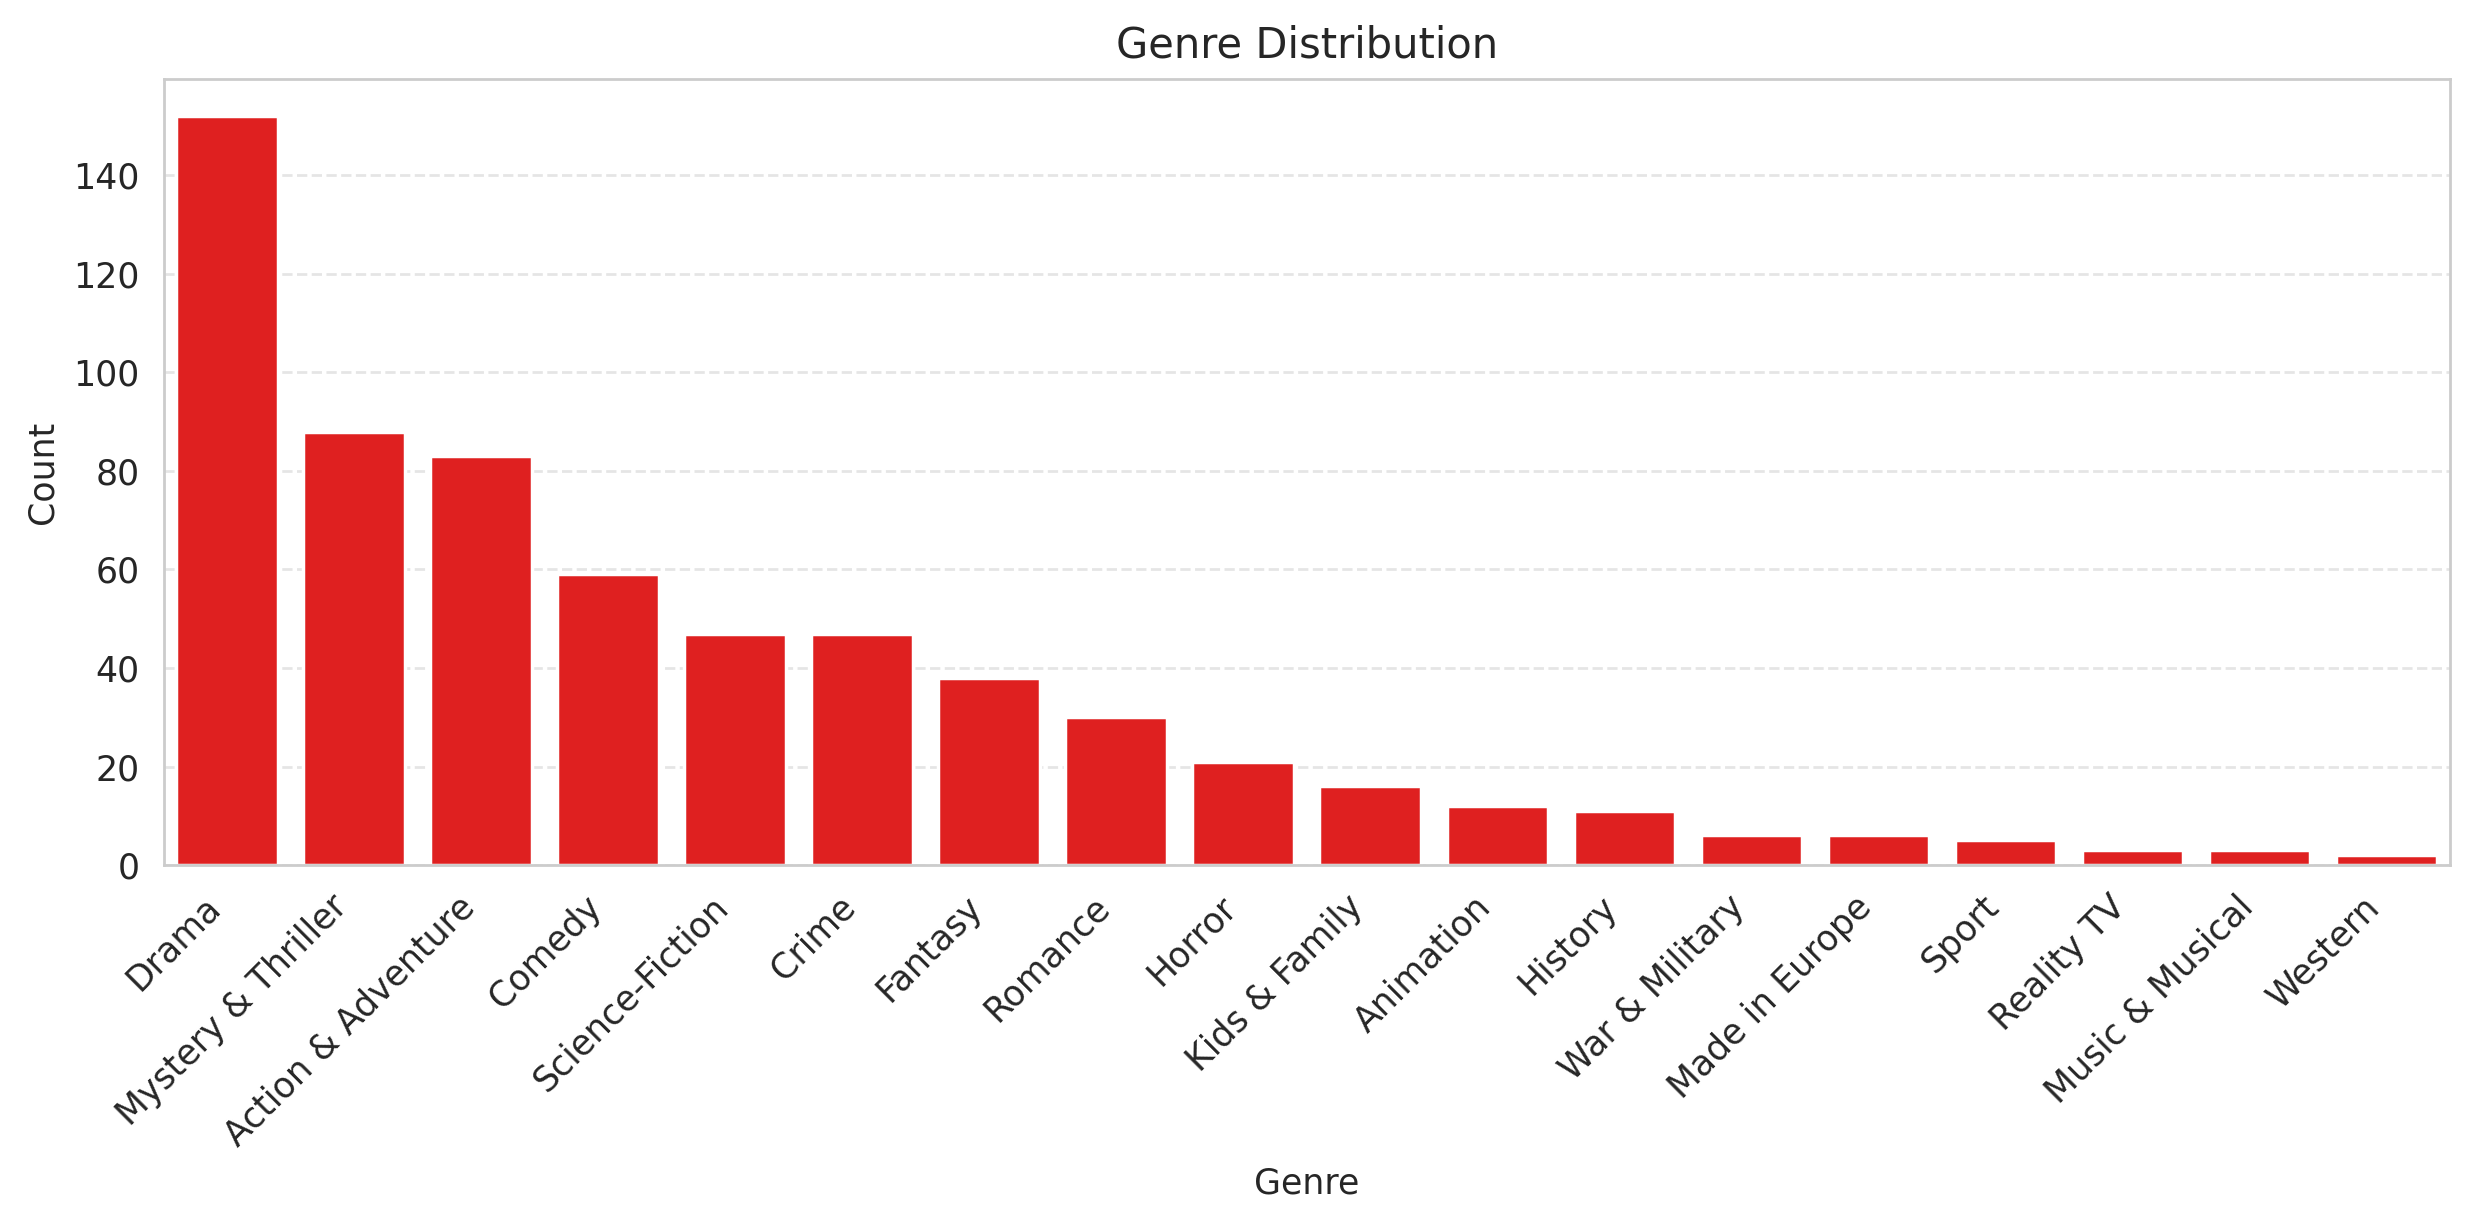

In [ ]:
#Let's Visvalize it using word cloud

# Convert the Series into a DataFrame with 'Genre' and 'count' columns
df = pd.DataFrame(genre_count).reset_index()

# Create bar plot
plt.figure(figsize=(10, 5), dpi=250)

# Plot the barplot
sns.barplot(x=df['Genre'], y=df['count'], color='red')

# Set labels and title
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add grid lines only on the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

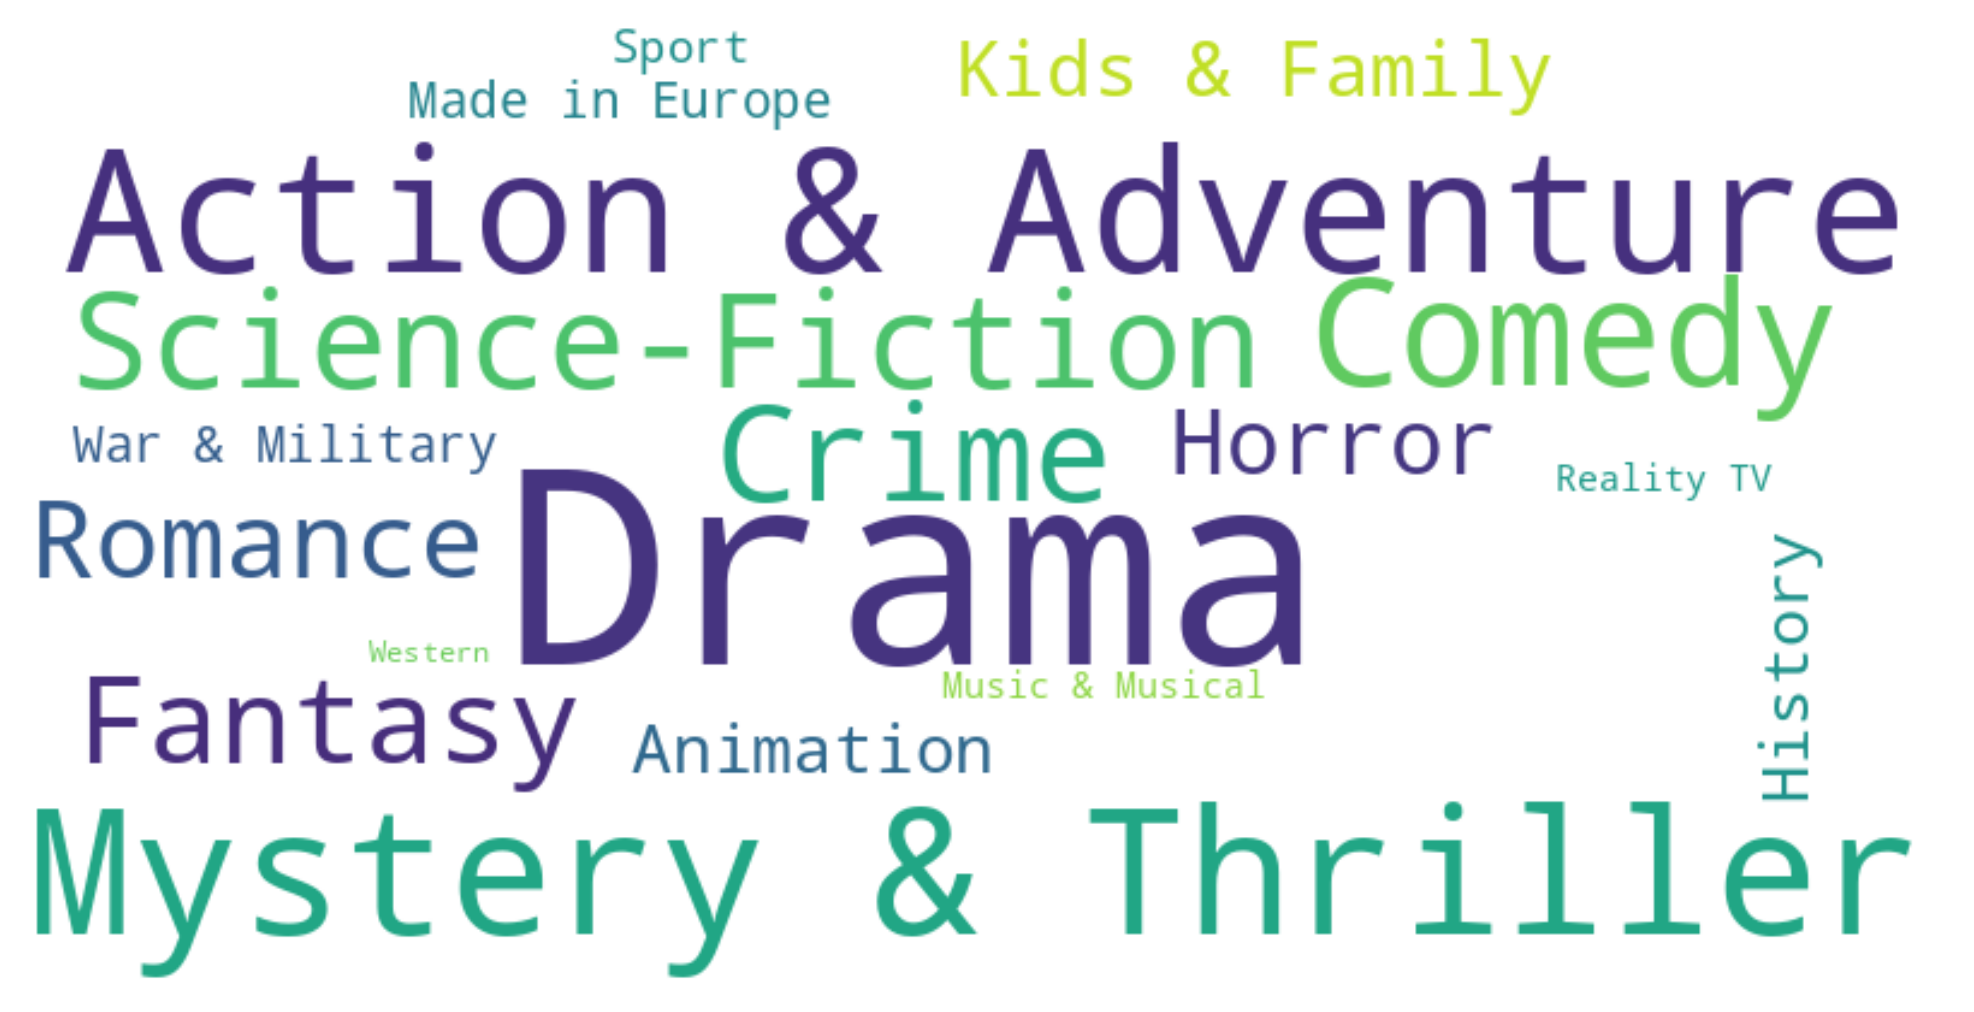

In [ ]:
#Let's Visvalize it using word cloud

#Importing Relevent Library.
from wordcloud import WordCloud

# Generate word cloud from genre frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_count)

# Display the word cloud
plt.figure(figsize=(10, 5), dpi=250)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Conclusion from the data:**

## Most Common Genres:
The top genres by count are Drama (152), followed by Mystery & Thriller (88) and Action & Adventure (83) , showing that these genres are popular among the sampled movies.

## Less Common Genres:
Some genres have relatively lower counts, such as Western (2), Sport (2), Music & Musical (1), and Reality TV (1), showing that these genres might be less frequently produced or less popular among the sampled movies.

## Variety of Genres:
The list includes a diverse range of genres, such as Crime, Comedy, Science-Fiction, Fantasy, Romance, and more, showing that there are a variety of choices of genres for viewers to watch.

## Specialized Genres:
Genres like War & Military, Made in Europe, and Animation cater to audience with specific interests or demographics. They have lower counts compared to more mainstream genres but still represent a segment of the movie market.

## Absence of Some Genres:
Notably, there might be some genres absent from this list, such as Thriller, Adventure, or Horror. This could suggest either they are not represented in the sampled data or have been grouped under broader categories like Mystery & Thriller or Action & Adventure. Overall, this distribution provides insights into the popularity and diversity of movie genres within the sampled dataset.

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here

# Extract individual streaming services and count occurrences to find the predominant one among them.
streaming_service_count = final_data['Stream_Service'].explode().str.strip().value_counts()

#Printing Top Genres.
streaming_service_count

Stream_Service
Netflix                             74
Amazon Prime Video                  64
Jio Cinema                          27
Hotstar                             15
Zee5                                11
Sony Liv                             9
Lionsgate Play                       7
Lionsgate Play Apple TV Channel      7
Lionsgate Play Amazon Channel        7
Crunchyroll                          6
aha                                  6
Amazon miniTV                        5
VI movies and tv                     4
Alt Balaji                           4
Apple TV Plus                        3
Eros Now                             3
Eros Now Select Apple TV Channel     3
Tubi TV                              3
MX Player                            2
Hoichoi                              1
MUBI                                 1
Name: count, dtype: int64

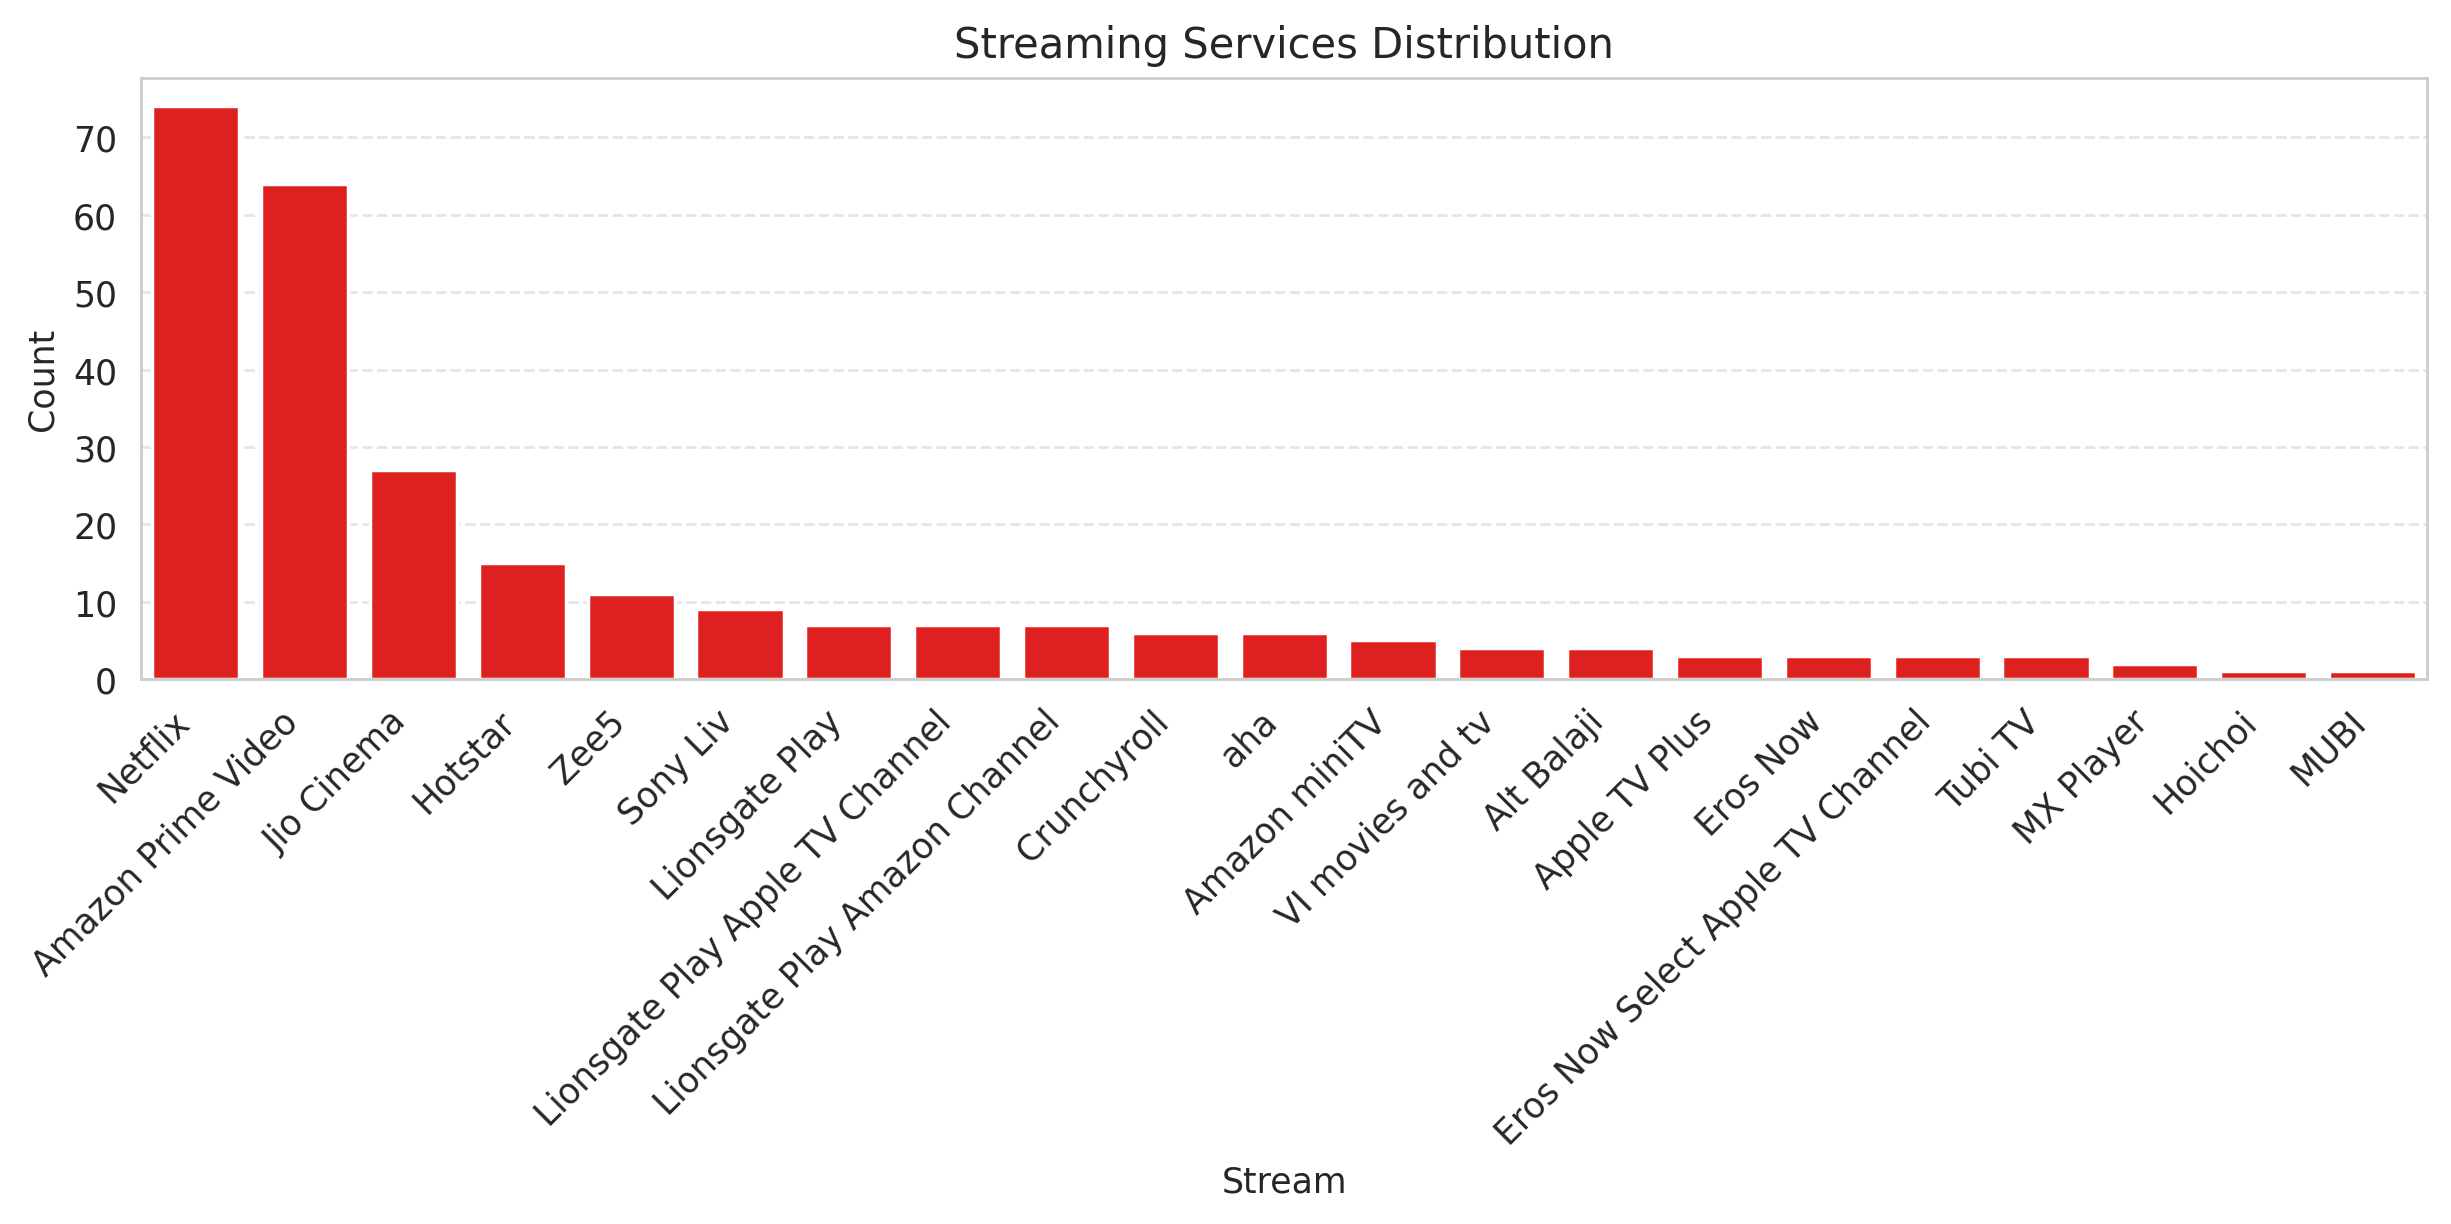

In [ ]:
# Convert the Series into a DataFrame with 'Stream_Service' and 'count' columns
stream_df = pd.DataFrame(streaming_service_count).reset_index()

# Create bar plot
plt.figure(figsize=(10, 5), dpi=250)

# Plot the barplot
sns.barplot(x='Stream_Service', y='count', data=stream_df, color='red')

# Set labels and title
plt.title('Streaming Services Distribution')
plt.xlabel('Stream')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines only on the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

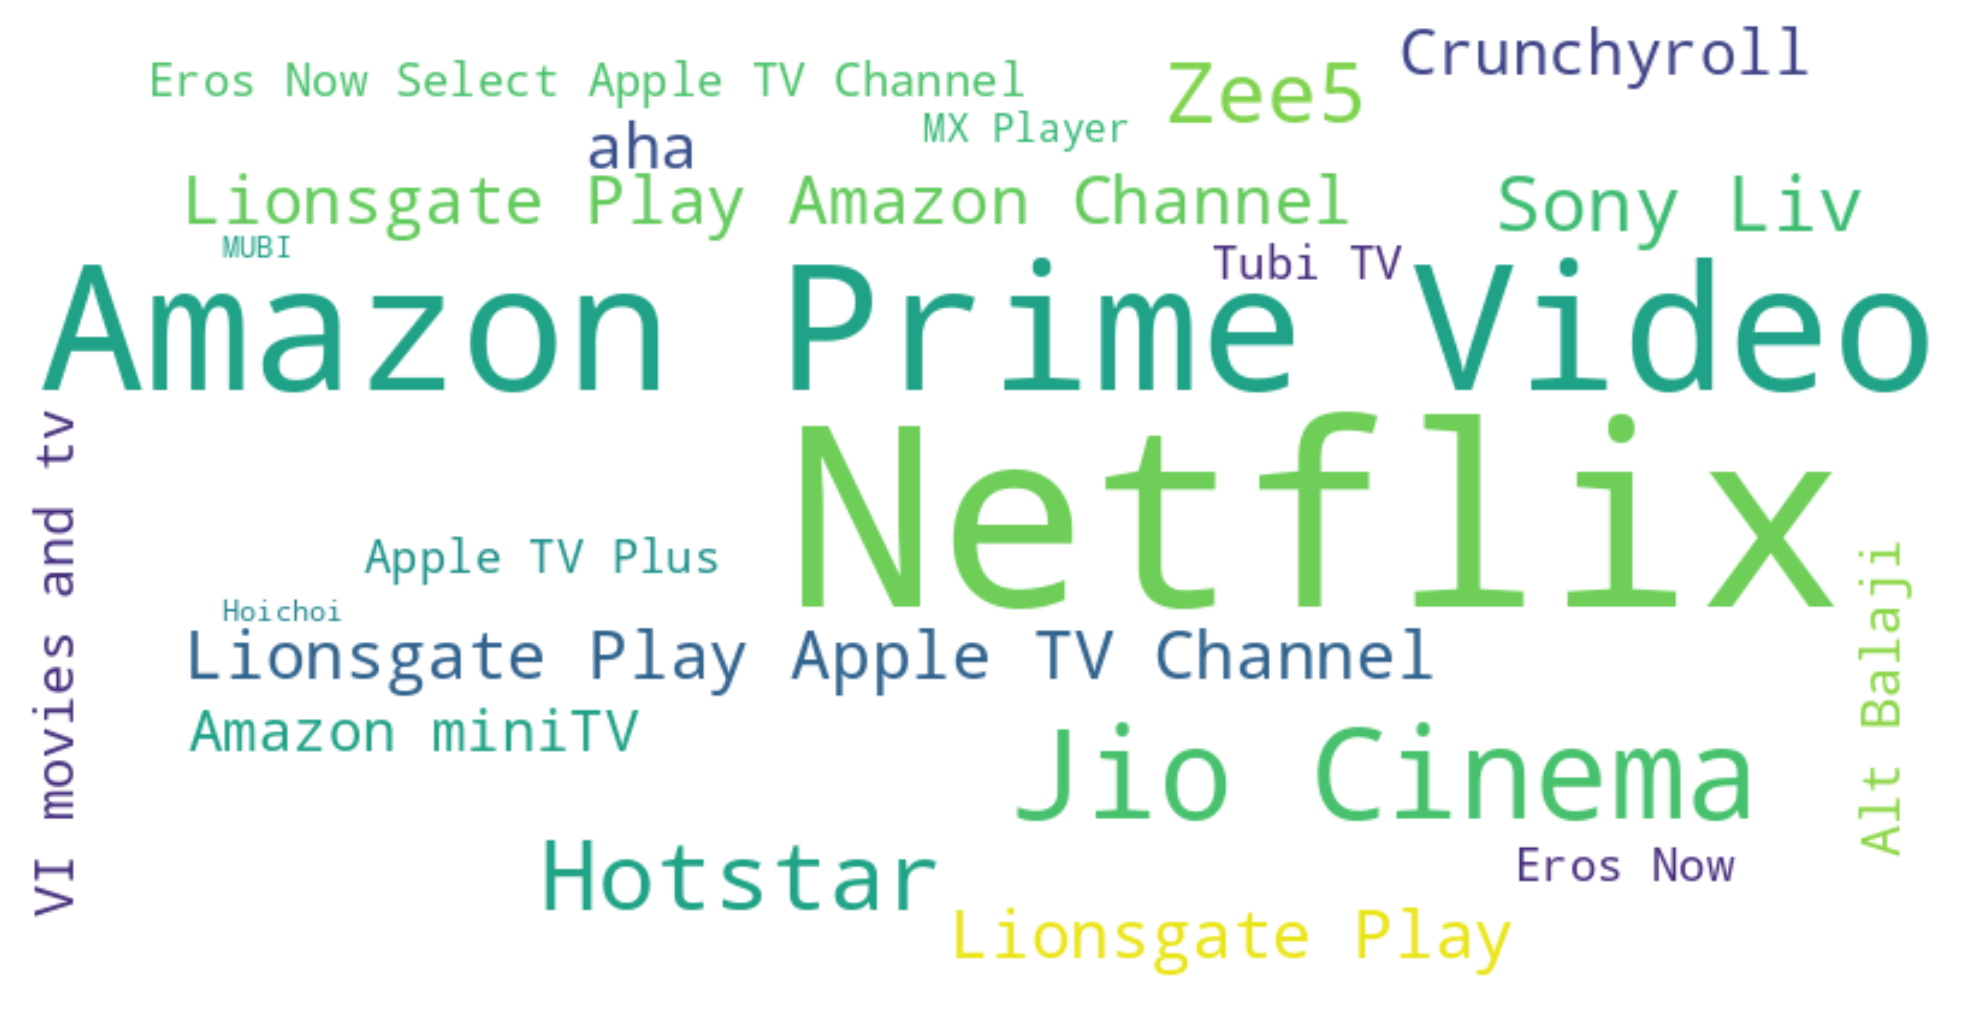

In [ ]:
#Let's Visvalize it using word cloud

#Importing Relevent Library.
from wordcloud import WordCloud

# Generate word cloud from genre frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(streaming_service_count)

# Display the word cloud
plt.figure(figsize=(10, 5), dpi=250)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Conclusion from the data:**

## Predominant streaming service:
Netflix (74) is the predominant, most used streaming service by viewers followed by Amazon Prime Video (64), Jio Cinema (27), Hotstar (15), Zee5 (11), Sony Liv (9) and so on within sampled dataset. This shows the preference of audience when it comes to streaming service and the kind and the style of content (content style of the individual streaming company) viewers like to watch. It also tells us that Netflix provides the best overall experience to the customers compared to others in this dataset.

## Lesser-Known Platforms:
Platforms like Sun Nxt, VI movies and tv, and MX Player have relatively lower occurrences, indicating that they might be less popular or have a smaller user base within the sampled dataset.

## Emerging Players:
Some platforms such as Apple TV Plus and Amazon miniTV have a moderate presence, indicating potential growth or emerging popularity in the streaming market.

## Channels Within Platforms:
The presence of channels within platforms, such as Lionsgate Play Apple TV Channel and Lionsgate Play Amazon Channel, suggests partnerships or additional offerings within specific streaming services.

## Presence of Niche Platforms:
Some platforms like Crunchyroll and aha cater to specific interests such as anime or regional content, respectively. Although they have fewer occurrences compared to mainstream platforms, they still represent a segment of the streaming market.

## Variety of Streaming Options:
The list includes a diverse range of streaming services, including Hotstar, Jio Cinema, Sony Liv, Zee5, and others, showing there are a variety of options available for streaming content in the sampled data.

Overall, this distribution provides insights into the popularity and diversity of streaming services among the sampled dataset, reflecting the landscape of streaming platforms and their varying degrees of prominence.

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format

# Save the DataFrame 'tv_show_data' to a CSV file named 'justwatch-tv-show-data.csv' without including row indices.
tv_show_data.to_csv('justwatch-tv-show-data', index=False)

# Save the DataFrame 'movies_data' to a CSV file named 'justwatch-movies-data.csv' without including row indices.
movies_data.to_csv('justwatch-movies-data', index=False)

# Save the DataFrame 'final_data' to a CSV file named 'justwatch-final-data.csv' without including row indices.
final_data.to_csv('justwatch-final-data', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

## Folder Name: yashvardhan-tomar-imdb-data

https://drive.google.com/drive/folders/1OLW4mdl5vabn9bEmXnR0GJB-Ei23bbZE?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***